Кол-во кластеров: 4
Нет шумовых объектов! Все распределены по кластерам
Кластер 1 : [[480, 451], [495, 445], [548, 540], [559, 558], [490, 485], [387, 474], [392, 389], [387, 373], [451, 351], [450, 446], [451, 551], [462, 462], [559, 458], [594, 489], [594, 490], [587, 373]]
Кластер 2 : [[187, 274], [189, 183], [293, 288], [193, 192]]
Кластер 3 : [[1561, 962], [1550, 946], [1493, 992], [1559, 959]]
Кластер 4 : [[788, 787], [790, 850], [751, 751], [789, 783], [694, 689], [594, 690], [688, 687], [662, 662], [693, 688], [661, 662], [695, 695]]


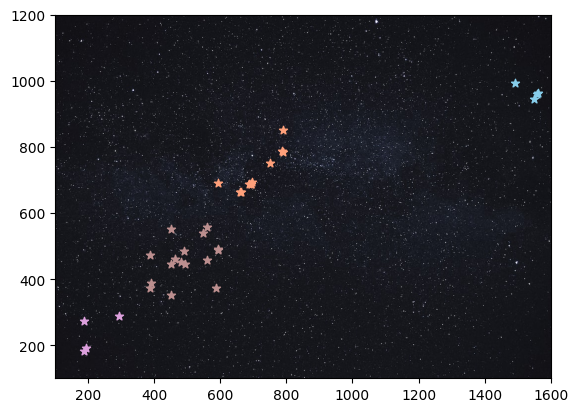

In [4]:
from math import hypot
import matplotlib.pyplot as plt
#5 точек MST cure
data = [[480, 451], [187, 274], [193, 192], [587, 373], [1561, 962], [293, 288], [462, 462], [788, 787], [594, 490],
        [594, 489], [559, 458], [392, 389], [189, 183], [451, 551], [695, 695], [450, 446], [480, 451], [490, 485],
        [1559, 959], [451, 351], [548, 540], [387, 474], [1493, 992], [387, 373], [661, 662], [693, 688], [662, 662],
        [688, 687], [594, 690], [694, 689], [559, 558], [392, 389], [789, 783], [751, 751], [495, 445], [1550, 946],
        [790, 850]]
e = 110 #Размер окрестности
m = 4 #Кол-во точек в окрестности для корневого
colors = ['white','rosybrown','plum','skyblue','lightsalmon','slategrey','pink']
img = plt.imread('spb.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[100, 1600, 100, 1200])


def neighbor_search(p, e, distance): #Поиск других точек в окрестности
    n = []
    for q in data: #Для каждой точки из списка
        if distance(p, q) < e: #Если точка лежит в окрестности
            n.append(q) #Добавляем в список соседей
    return n


def cluster(d, neighbours, e, distance, k, clusters, noise, visit, cl):
    clusters[k] = []
    clusters[k].append(d) #Добавляем точку в кластер
    cl.append(d) #Добавляем точку в список точек принадлежащих кластеру
    while neighbours: #Проходимся по всем соседним точкам
        q = neighbours.pop() #Берём последнюю точку из списка
        if q not in visit: #Если точки нет в списке посещённых
            visit.append(q) #Добавляем точку в список посещённых
            neighbour = neighbor_search(q, e, distance) #Поиск соседних точек
            if len(neighbour) > m: #Если кол-во соседей больше порога
                neighbours.extend(neighbour) #Добавляем соседей точки в список соседей(Возможных корневых)
        if q not in cl: #Если точка не распределена в кластер
            cl.append(q)
            clusters[k].append(q)
            if q in clusters[noise]: #Если точка входит в список шумовых объектов, то удаляем
                clusters[noise].remove(q)


def DBSCAN(data, e, m, distance):
    noise = 0
    k = 0 #Кол-во кластеров
    visit = [] #Посещённые точки
    cl = []  #Список точек, которые распределены по кластерам
    clusters = {noise: []} #Список(Словарь) кластеров с входящими в них точками
    for d in data: #Для точек в списке
        if d in visit:#Если точка была посещена, то переходим к следующей
            continue
        visit.append(d) #Добавляем в список посещённых
        neighbours = neighbor_search(d, e, distance) #Возвращает точки в окрестности
        if len(neighbours) >= m: #Если кол-во точек больше/равно требуемого для корневого
            k += 1
            cluster(d, neighbours, e, distance, k, clusters, noise, visit, cl) #Создаём кластер
        else: #Иначе добавляем в список шумовых объектов
            clusters[noise].append(d) #Добавляем в список шумовых объектов
    return [clusters, k]


c = DBSCAN(data, e, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
cl = c[0]
k = c[1]
print('Кол-во кластеров:', k)
if len(cl[0]) == 0:
    print('Нет шумовых объектов! Все распределены по кластерам')
else:
    print('Шумовые объекты:', cl[0])
for i in range(1, len(cl)):
    print('Кластер', i, ':', cl[i])
for color, points in zip(colors, cl.values()):
    x1 = [p[0] for p in points]
    x2 = [p[1] for p in points]
    plt.scatter(x1, x2, c=color, marker='*')
plt.show()
